# Zadanie domowe

W przypadku obrazów w odcieniach szarości pojedynczy piksel z zakresu [0; 255] reprezentowany jest jako 8-bitowa liczba bez znaku.
Pewnym rozszerzeniem analizy sposobu reprezentacji obrazu może być następujący eksperyment.
Załóżmy, że z każdego z 8 bitów możemy stworzyć pojedynczy obraz binarny (ang. _bit-plane slicing_).
Dla obrazka _100zloty.jpg_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg) stwórz 8 obrazów, z których każdy powinien zawierać jedną płaszczyznę bitową.
Podpowiedź $-$ warto sprawdzić, jak realizuje się bitowe operacje logiczne.
Zastosowanie takiej dekompozycji obrazu pozwala na analizę ,,ważności'' poszczególnych bitów.
Jest to użyteczne w kwantyzacji, ale także w kompresji.

W drugim etapie zadania proszę spróbować odtworzyć obraz oryginalny z mniejszej liczby obrazów binarnych.
Warto zacząć od dwóch najbardziej znaczących bitów, a później dodawać kolejne.
Należy utworzyć co najmniej trzy wersje zrekonstruowanych obrazów.
Podpowiedź $-$ rekonstrukcja obrazu to mnożenie przez odpowiednią potęgę liczby 2 (przesunięcie bitowe) oraz dodawanie.

In [1]:
import cv2
import os
import requests
import matplotlib.pyplot as plt
import numpy as np

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/'
fileName = '100zloty.jpg'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

In [2]:
def create_bit_image(img, mask):
    height, width = img.shape[:2]
    mask_matrix = np.full((height, width), mask, dtype=np.uint8)
    return cv2.bitwise_and(img, mask_matrix)

In [3]:
def add_bit_images(bit_images):
    result = np.zeros(bit_images[0].shape, dtype=np.uint8)
    for img in bit_images:
        result = cv2.add(img, result)

    return result

In [4]:
def show_img(img):
    plt.imshow(img)
    plt.gray()
    plt.axis('off')
    plt.show()

(847, 1661)


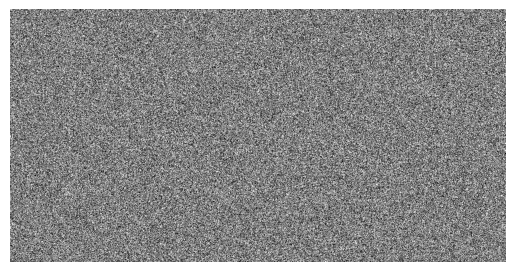

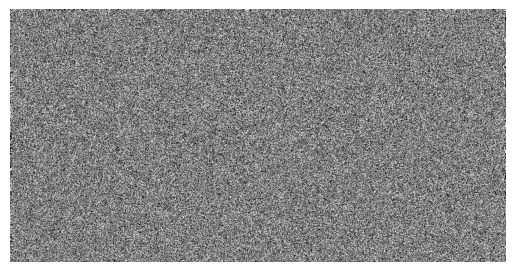

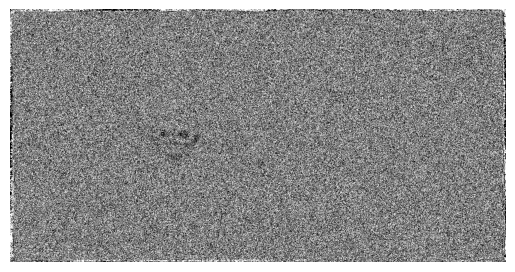

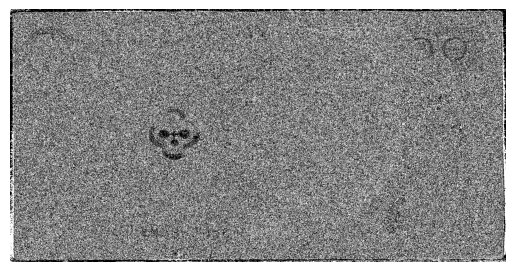

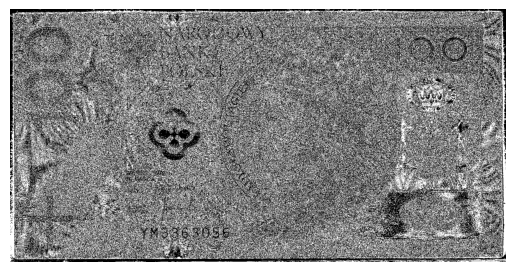

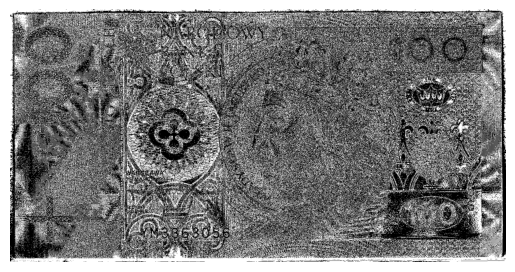

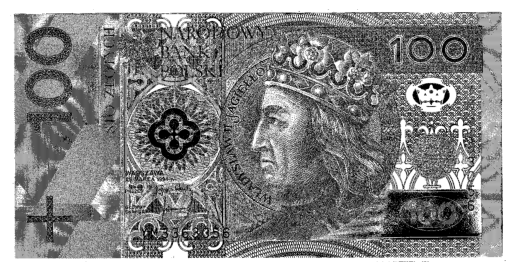

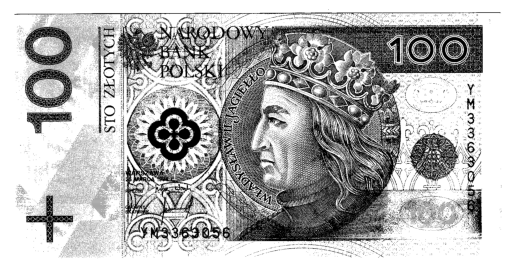

In [5]:
original_img = cv2.imread('100zloty.jpg')
original_img = cv2.cvtColor(original_img, cv2.COLOR_RGB2GRAY)
print(original_img.
      shape)
bit_images = []
for i in range (8):
    bit_images.append(create_bit_image(original_img, 2**i))
    show_img(bit_images[-1])


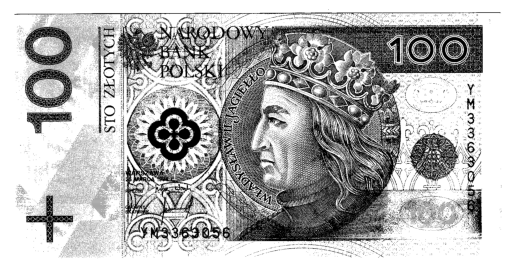

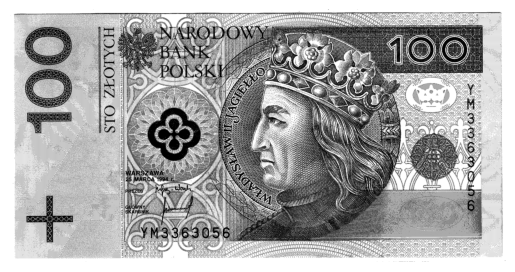

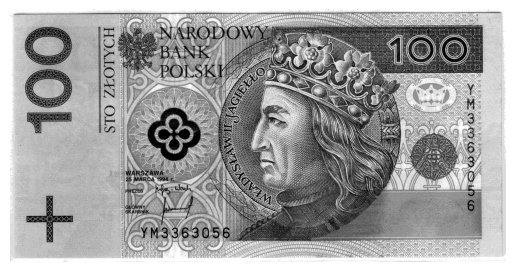

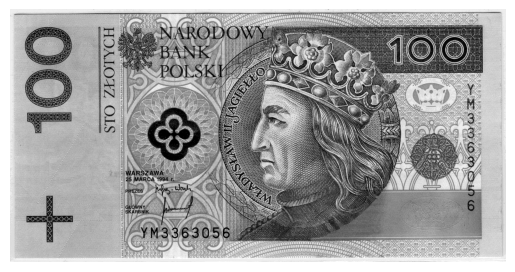

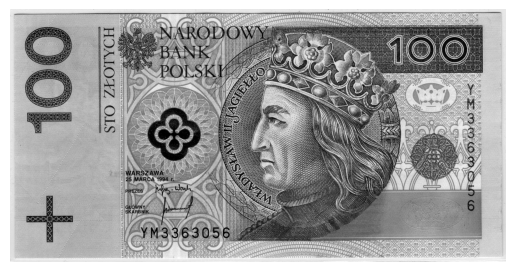

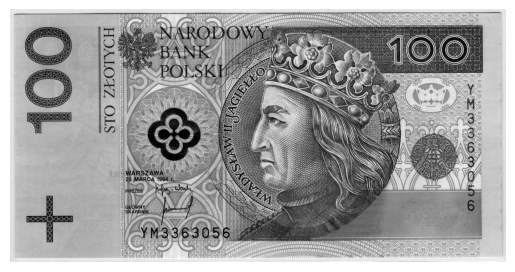

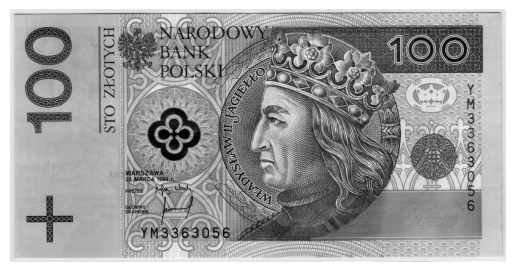

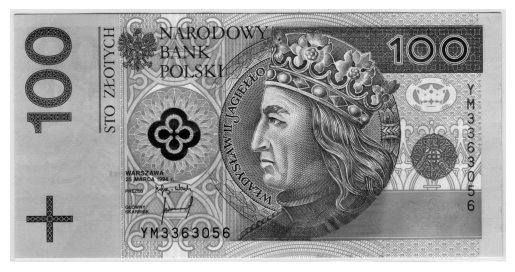

In [6]:
for i in range(7, -1, -1):
    result = add_bit_images(bit_images[i:])
    show_img(result)